In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from sklearn.metrics import jaccard_score

In [2]:
def jaccard_similarity(set1, set2):
    # intersection of two sets
    intersection = len(set1.intersection(set2))
    # Unions of two sets
    union = len(set1.union(set2))
    
    return intersection / union

In [3]:
def find_majority_infected_nodes(freq_df,K):
    # go through data frame, find seeds that are infected more than K times
    seed_amount = len(set(freq_df["seed"]))
    freq_agg = freq_df.groupby(["sent"])["d_f"].agg("sum")
    freq_agg = freq_agg/seed_amount
    freq_agg = freq_agg.loc[freq_agg > K]
    return freq_agg

In [4]:
# Load Data 
ranked_data = pd.read_csv("../data/data_y_real.csv")
ranked_data['o_s'] = ranked_data['d_c'] + ranked_data['d_i']
outbreak_sizes = ranked_data.groupby(["seed"])["o_s"].agg("max")
new_df = pd.DataFrame()
new_df["seed"] = outbreak_sizes.index
# Get Full Outbreak Size
new_df["real_os"] = list(outbreak_sizes)
ranked_data = ranked_data.merge(new_df,left_on="seed",right_on="seed")
ranked_data = ranked_data[ranked_data["o_s"] > 0]
out_sizes = [ x for x in list(outbreak_sizes)  if x > 0 ]
# Count Number of times 
just_zero = ranked_data[ranked_data['o_s'] == 0].groupby(['seed']).size().rename('n_outbreaks')
zero_ids = list(just_zero.index)
good_seeds = []
## if an outbreak occurs - what is probability of detecting it for a given sentinel? 
g_zero = (ranked_data.groupby(["seed"])["real_os"].agg("max"))
zero_freq = list(just_zero)
zero_amount = 0
bad_seeds = []
counter = 0

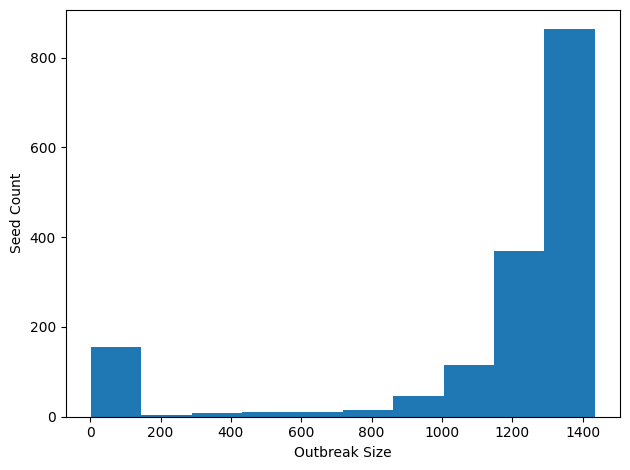

In [5]:
plt.hist(out_sizes)
plt.xlabel("Outbreak Size")
plt.ylabel("Seed Count")
plt.tight_layout()
plt.savefig("outsize_dist.png")

In [6]:
for c in ['d_t','d_i','d_c','d_f']:
    ranked_data.loc[ranked_data[c] == 0, c] = np.nan
ranked_data = ranked_data.dropna(subset=["d_t","d_i","d_c"])
sum_rank_df = ranked_data.groupby(["sent"])["d_f"].agg("sum")/1550
all_freqs = list(sum_rank_df)
all_x = [i for i in range(0,len(all_freqs))]

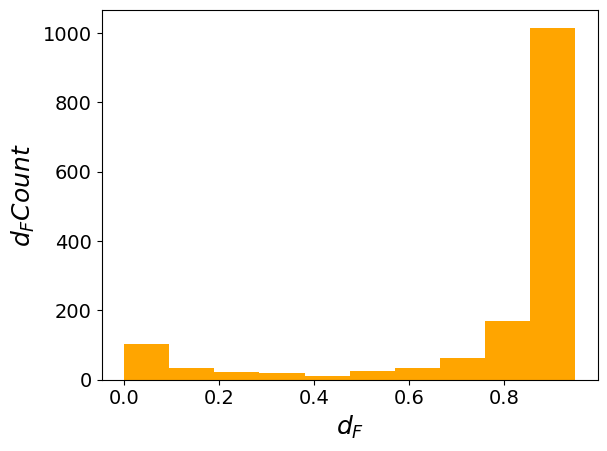

In [7]:
#fig,axs = plt.subplots(1,1,figsize=(20,23))
#fig.suptitle(f" $d_F$ total  \n",fontsize=30)
med_dt = list(ranked_data.groupby(["sent"])["d_t"].agg("median"))
avg_dt = list(ranked_data.groupby(["sent"])["d_t"].agg("mean"))
all_dc = list(ranked_data.groupby(["sent"])["d_c"].agg("median"))
all_di = list(ranked_data.groupby(["sent"])["d_i"].agg("median"))
axs_fs = 18
tick_fs = 14
new_freqs = []
for k in all_freqs:
    new_freqs.append(k)
plt.hist(new_freqs,color="orange")
plt.xlabel(f"$d_F$",fontsize=axs_fs)
plt.ylabel(f"$d_F Count$",fontsize=axs_fs)
plt.tick_params(labelsize=tick_fs)
#axs[1].hist(all_dt)
#axs[1].set_xlabel(f"$d_T$",fontsize=axs_fs)
#axs[1].set_ylabel(f"$d_T$ Count",fontsize=axs_fs)
#axs[1].tick_params(labelsize=tick_fs)
#fig.tight_layout()
#print(min
plt.savefig("df_clean.png")

Compare distributions of $d_I$, $d_T$ based on mean, median

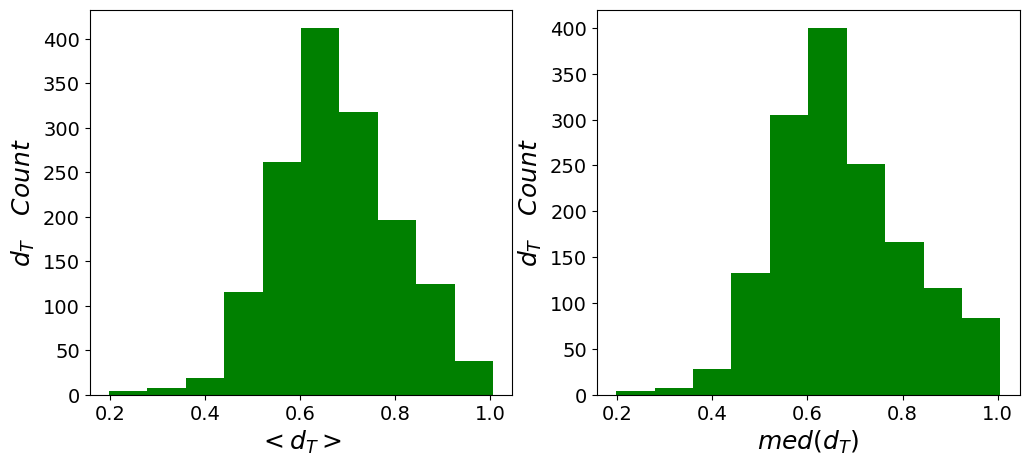

In [8]:
ranked_data["norm_dt"] = ranked_data["d_t"] / 512
ranked_data["norm_di"] = ranked_data["d_i"] / ranked_data["o_s"]
fig,axs = plt.subplots(1,2,figsize=(12,5))

med_dt = list(ranked_data.groupby(["sent"])["norm_dt"].agg("median"))
avg_dt = list(ranked_data.groupby(["sent"])["norm_dt"].agg("mean"))


axs[0].hist(avg_dt,color="green")
axs[0].set_xlabel(f"$<d_T>$",fontsize=axs_fs)
axs[0].set_ylabel(f"$d_T \quad Count$",fontsize=axs_fs)
axs[0].tick_params(labelsize=tick_fs)
axs[1].hist(med_dt,color="green")
axs[1].set_xlabel(f"$med(d_T)$",fontsize=axs_fs)
axs[1].set_ylabel(f"$d_T \quad Count$",fontsize=axs_fs)
axs[1].tick_params(labelsize=tick_fs)

0.33203125 2.0
0.341796875 1.0
0.283203125 2.0
0.3671875 1450.0
0.287109375 1.0
0.197265625 1.0
0.310546875 1.0
0.3828125 1449.0
0.294921875 1.0
0.208984375 2.0
0.234375 1.0
0.392578125 4.0
0.24609375 1.0
0.373046875 1450.0
0.380859375 1449.0
0.376953125 1449.0
0.30859375 1.0


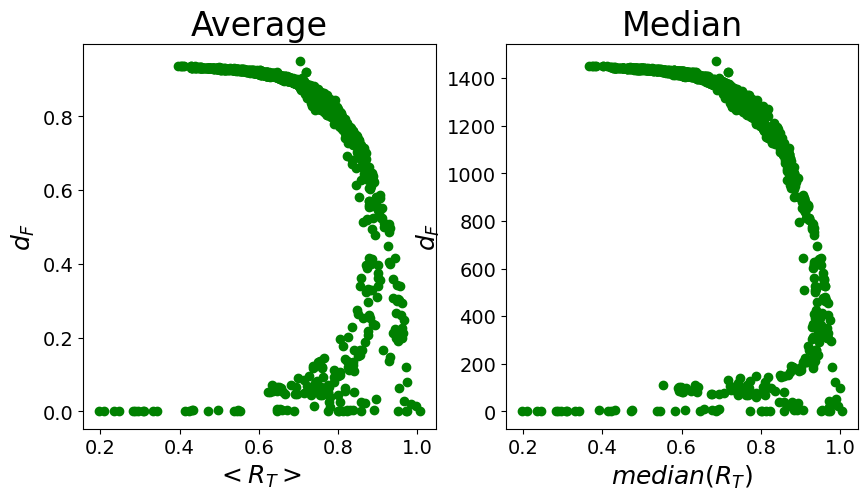

In [9]:
ranked_data["norm_dt"] = ranked_data["d_t"] / 512
ranked_data["norm_di"] = ranked_data["d_i"] / ranked_data["real_os"]
fig,axs = plt.subplots(1,2,figsize=(10,5))
title_fs = 24
sent_dt = ranked_data.groupby(["sent"])["norm_dt"].agg("mean")
sent_idx = sent_dt.index
sum_rank_df = ranked_data.groupby(["sent"])["d_f"].agg("sum")/1550
combined = list(zip(list(sent_dt),list(sum_rank_df)))
dt_x = [x for x,y in combined]
df_y = [y for x,y in combined]
new_dtx = []
new_dfy = []
for d in range(0,len(dt_x)):
    new_dtx.append(dt_x[d])
    new_dfy.append(df_y[d])
        
axs[0].scatter(new_dtx,new_dfy,color="green")
axs[0].set_xlabel(f"$<R_T>$",fontsize=axs_fs)
axs[0].set_ylabel(f"$d_F$",fontsize=axs_fs)
axs[0].tick_params(labelsize=tick_fs)
axs[0].set_title("Average",fontsize=title_fs)
#axs[0].tight_layout()
sent_dt = ranked_data.groupby(["sent"])["norm_dt"].agg("median")
sent_idx = sent_dt.index
sum_rank_df = ranked_data.groupby(["sent"])["d_f"].agg("sum")
df_idx = sum_rank_df.index
combined = list(zip(list(sent_dt),list(sum_rank_df)))
dt_x = [x for x,y in combined]
df_y = [y for x,y in combined]
new_dtx = []
new_dfy = []
for d in range(0,len(dt_x)):
    if dt_x[d] < 0.4: 
        print(dt_x[d],df_y[d])
    new_dtx.append(dt_x[d])
    new_dfy.append(df_y[d])       
axs[1].scatter(new_dtx,new_dfy,color="green")
axs[1].set_xlabel(f"$median(R_T)$",fontsize=axs_fs)
axs[1].set_ylabel(f"$d_F$",fontsize=axs_fs)
axs[1].tick_params(labelsize=tick_fs)
axs[1].set_title("Median",fontsize=title_fs)
#axs[1].tight_layout()
fig.savefig("avgrt_df.png")

In [10]:
def ret_xy(rank,freq):
    combined = list(zip(list(rank),list(freq)))

    di_x = [x for x,y in combined]
    df_y = [y for x,y in combined]
    new_dix = []
    new_dfy = []
    for d in range(0,len(di_x)):
        new_dix.append(di_x[d])
        new_dfy.append(df_y[d])
    return new_dix,new_dfy

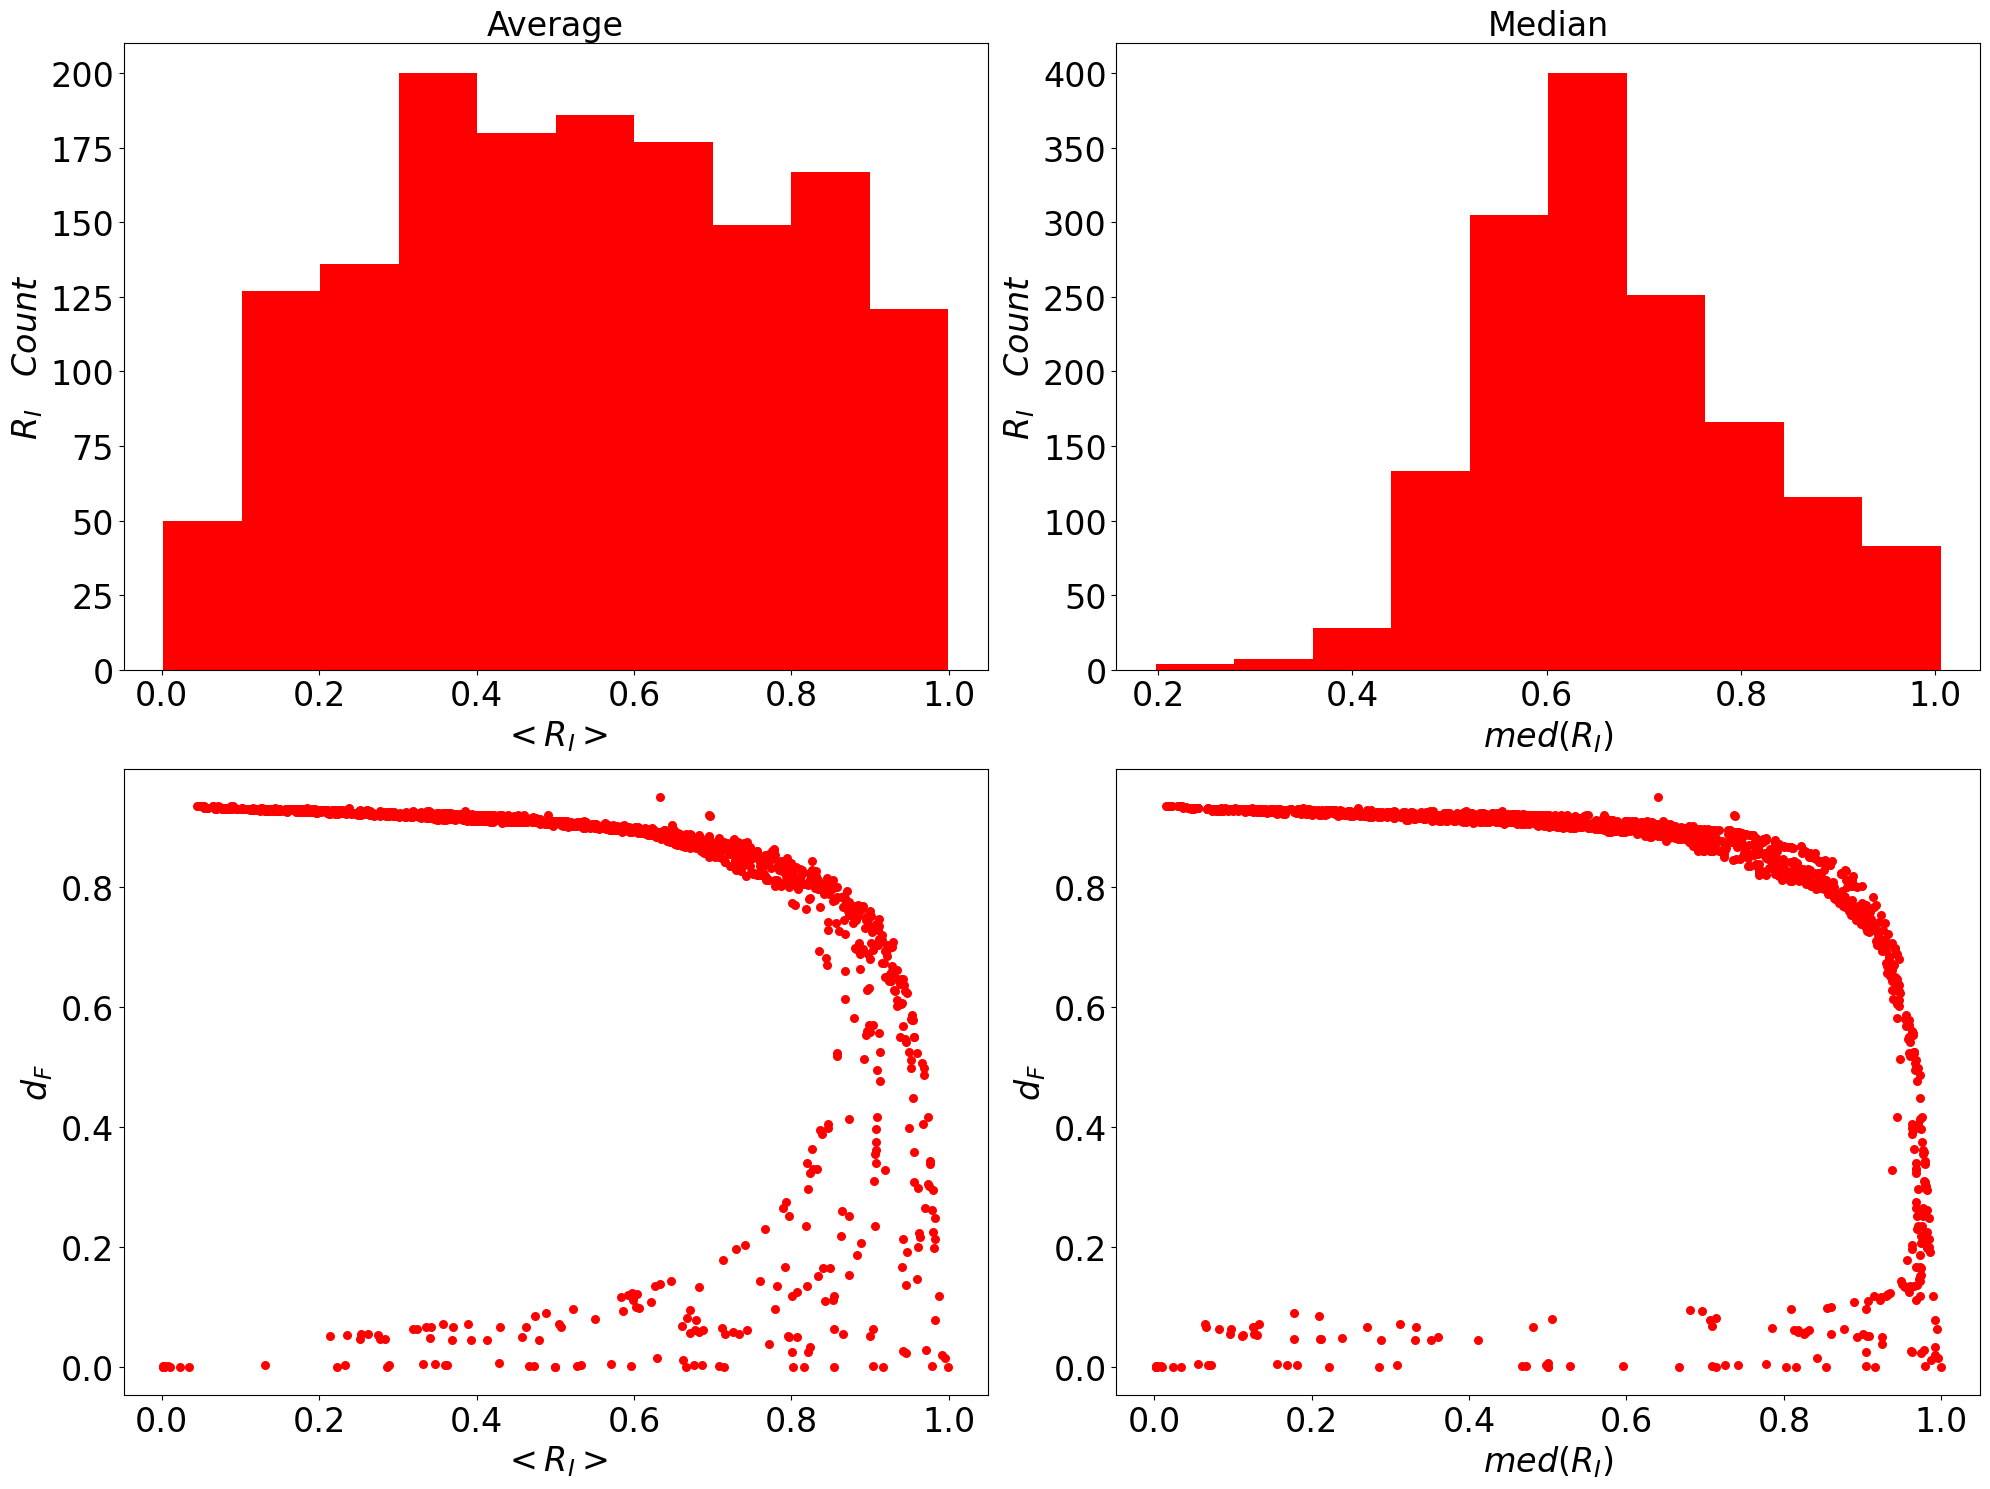

In [11]:
ranked_data["norm_dt"] = ranked_data["d_t"] / 512
ranked_data["norm_di"] = ranked_data["d_i"] / ranked_data["real_os"]
fig,axs = plt.subplots(2,2,figsize=(20,15))

med_di = list(ranked_data.groupby(["sent"])["norm_di"].agg("median"))
avg_di = list(ranked_data.groupby(["sent"])["norm_di"].agg("mean"))

axs_fs = 24
title_fs = 24
tick_fs = 24
scat_size = 30
# Plot Distribution
axs[0,0].set_title("Average",fontsize=title_fs)
axs[0,0].hist(avg_di,color="red")
axs[0,0].set_xlabel(f"$<R_I>$",fontsize=axs_fs)
axs[0,0].set_ylabel(f"$R_I \quad Count$",fontsize=axs_fs)
axs[0,0].tick_params(labelsize=tick_fs)
axs[0,1].hist(med_dt,color="red")
axs[0,1].set_xlabel(f"$med(R_I)$",fontsize=axs_fs)
axs[0,1].set_ylabel(f"$R_I \quad Count$",fontsize=axs_fs)
axs[0,1].tick_params(labelsize=tick_fs)
axs[0,1].set_title("Median",fontsize=title_fs)

# Plot Comparison against D_F
#sent_idx = sent_di.index
sum_rank_df = ranked_data.groupby(["sent"])["d_f"].agg("sum")/1550
df_idx = sum_rank_df.index
#mean_combined = list(zip(list(avg_di),list(sum_rank_df)))
davgi_x,davgf_y = ret_xy(avg_di,sum_rank_df)
dmedi_x,dmedf_y = ret_xy(med_di,sum_rank_df)
        
axs[1,0].scatter(davgi_x,davgf_y,color="red",s=scat_size)
axs[1,0].set_xlabel(f"$<R_I>$",fontsize=axs_fs)
axs[1,0].set_ylabel(f"$d_F$",fontsize=axs_fs)
axs[1,0].tick_params(labelsize=tick_fs)
#axs[1,0].set_title("Average",fontsize=title_fs)
axs[1,1].scatter(dmedi_x,dmedf_y,color="red",s=scat_size)
axs[1,1].set_xlabel(f"$med(R_I)$",fontsize=axs_fs)
axs[1,1].set_ylabel(f"$d_F$",fontsize=axs_fs)
axs[1,1].tick_params(labelsize=tick_fs)
#axs[1,1].title("Average",fontsize=title_fs)
#axs[1,1].tight_layout()
plt.tight_layout()
plt.savefig("allri_df.png")

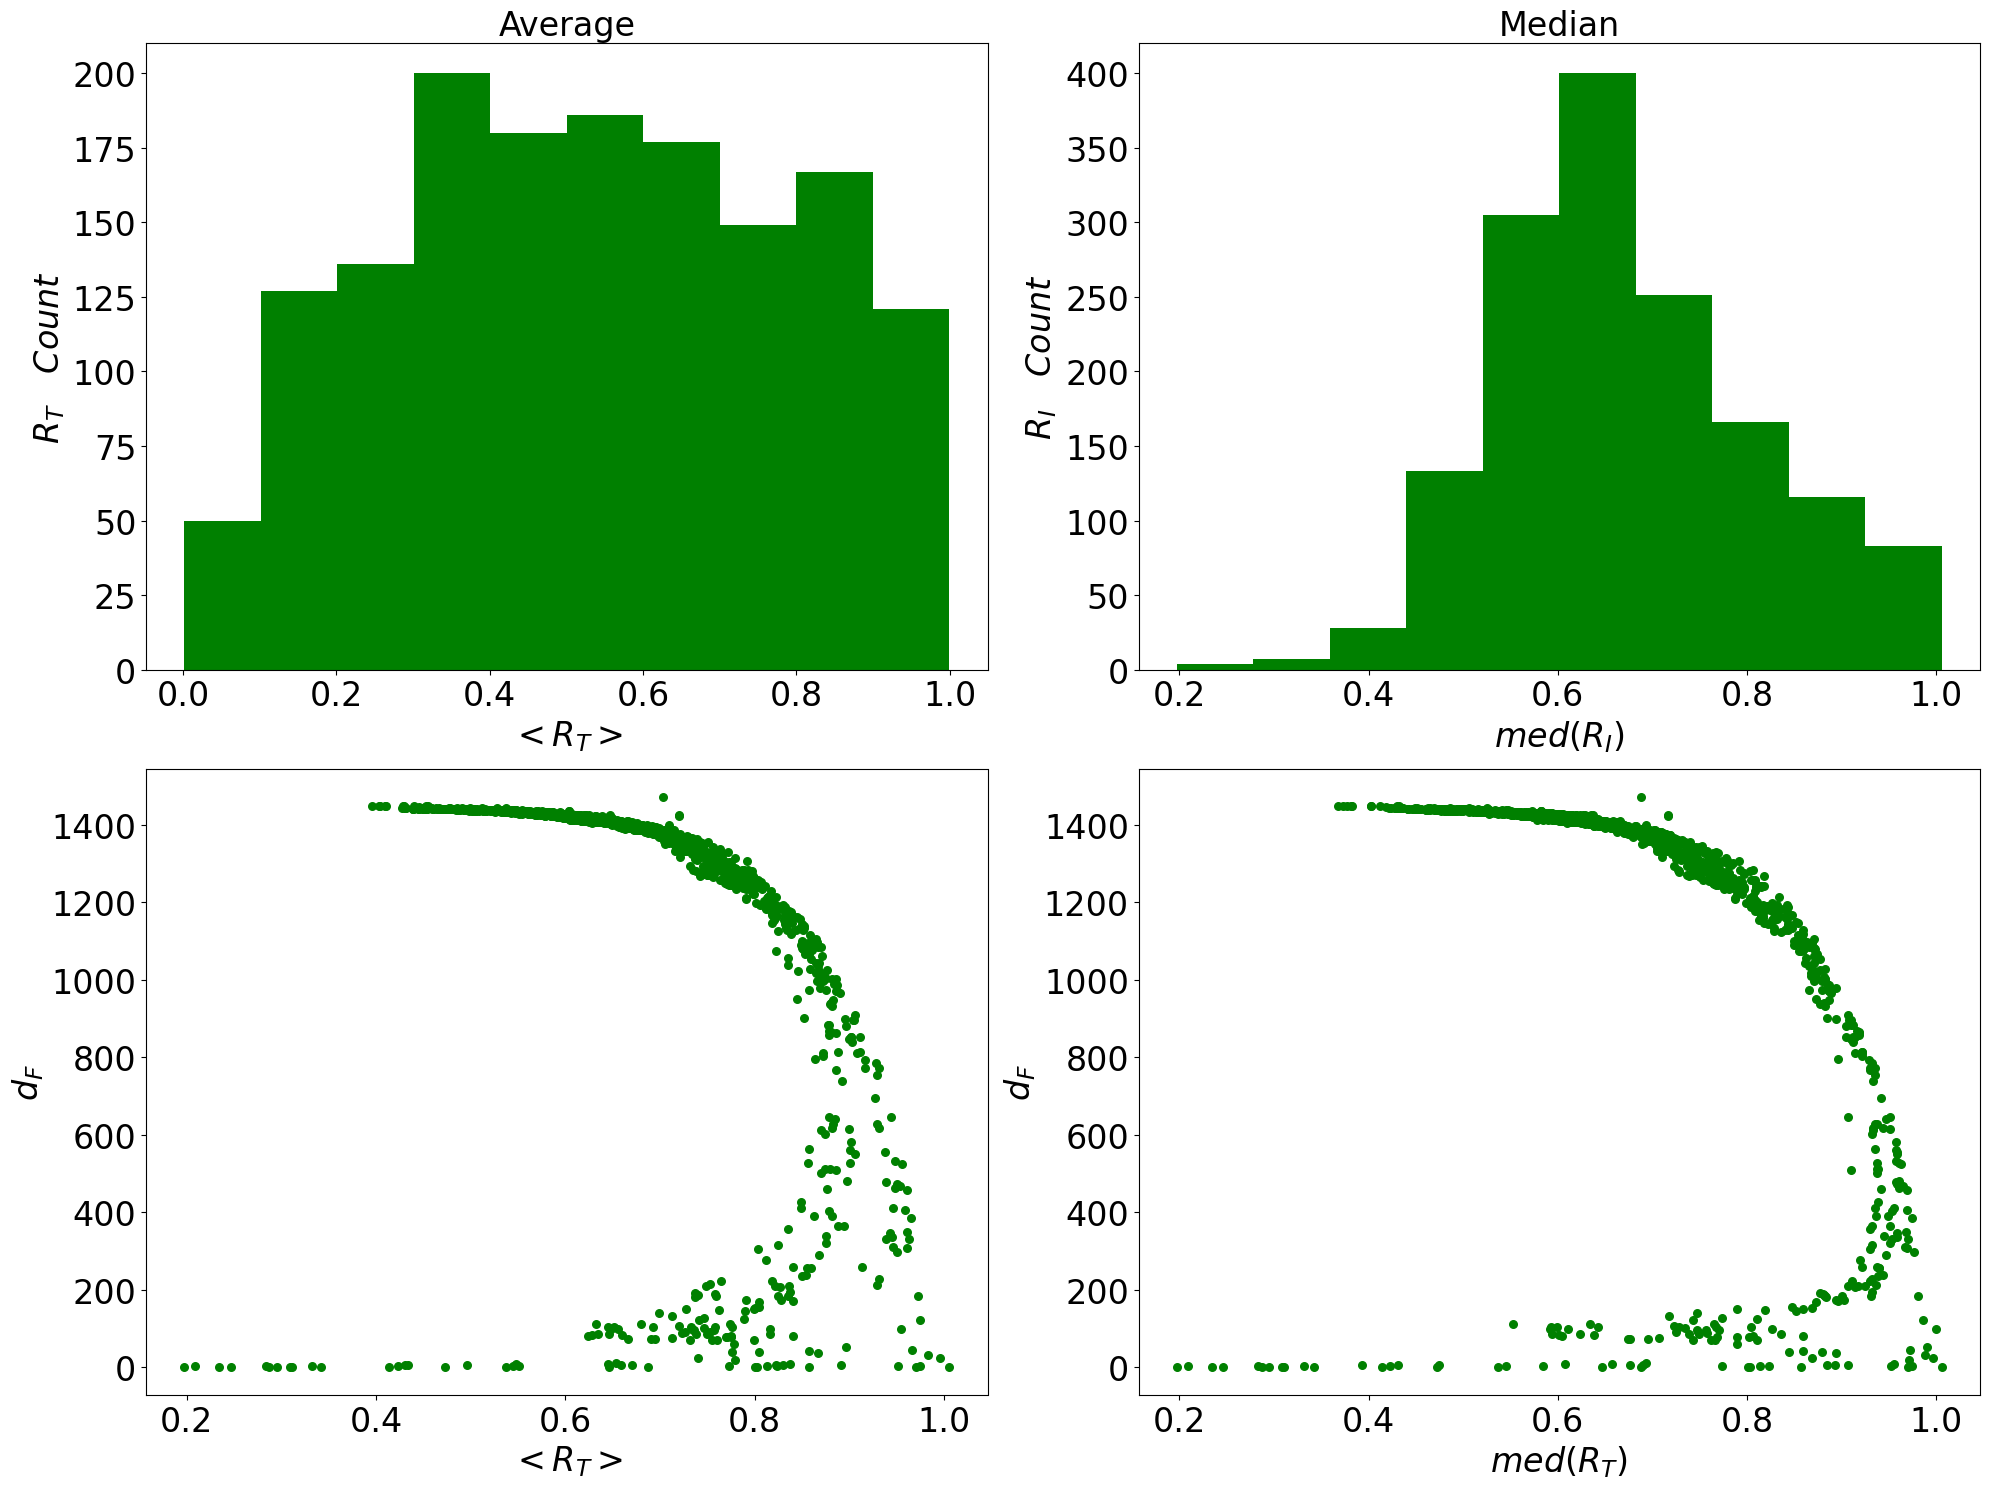

In [12]:
med_dt = list(ranked_data.groupby(["sent"])["norm_dt"].agg("median"))
avg_dt = list(ranked_data.groupby(["sent"])["norm_dt"].agg("mean"))
fig,axs = plt.subplots(2,2,figsize=(20,15))

axs_fs = 24
title_fs = 24
tick_fs = 24
scat_size = 30
# Plot Distribution
axs[0,0].set_title("Average",fontsize=title_fs)
axs[0,0].hist(avg_di,color="green")
axs[0,0].set_xlabel(f"$<R_T>$",fontsize=axs_fs)
axs[0,0].set_ylabel(f"$R_T \quad Count$",fontsize=axs_fs)
axs[0,0].tick_params(labelsize=tick_fs)
axs[0,1].hist(med_dt,color="green")
axs[0,1].set_xlabel(f"$med(R_I)$",fontsize=axs_fs)
axs[0,1].set_ylabel(f"$R_I \quad Count$",fontsize=axs_fs)
axs[0,1].tick_params(labelsize=tick_fs)
axs[0,1].set_title("Median",fontsize=title_fs)

# Plot Comparison against D_F
#sent_idx = sent_di.index
sum_rank_df = ranked_data.groupby(["sent"])["d_f"].agg("sum")
df_idx = sum_rank_df.index
#mean_combined = list(zip(list(avg_di),list(sum_rank_df)))
davgt_x,davgf_y = ret_xy(avg_dt,sum_rank_df)
dmedt_x,dmedf_y = ret_xy(med_dt,sum_rank_df)
        
axs[1,0].scatter(davgt_x,davgf_y,color="green",s=scat_size)
axs[1,0].set_xlabel(f"$<R_T>$",fontsize=axs_fs)
axs[1,0].set_ylabel(f"$d_F$",fontsize=axs_fs)
axs[1,0].tick_params(labelsize=tick_fs)
#axs[1,0].set_title("Average",fontsize=title_fs)
axs[1,1].scatter(dmedt_x,dmedf_y,color="green",s=scat_size)
axs[1,1].set_xlabel(f"$med(R_T)$",fontsize=axs_fs)
axs[1,1].set_ylabel(f"$d_F$",fontsize=axs_fs)
axs[1,1].tick_params(labelsize=tick_fs)
#axs[1,1].title("Average",fontsize=title_fs)
#axs[1,1].tight_layout()
plt.tight_layout()
plt.savefig("allrt_df.png")

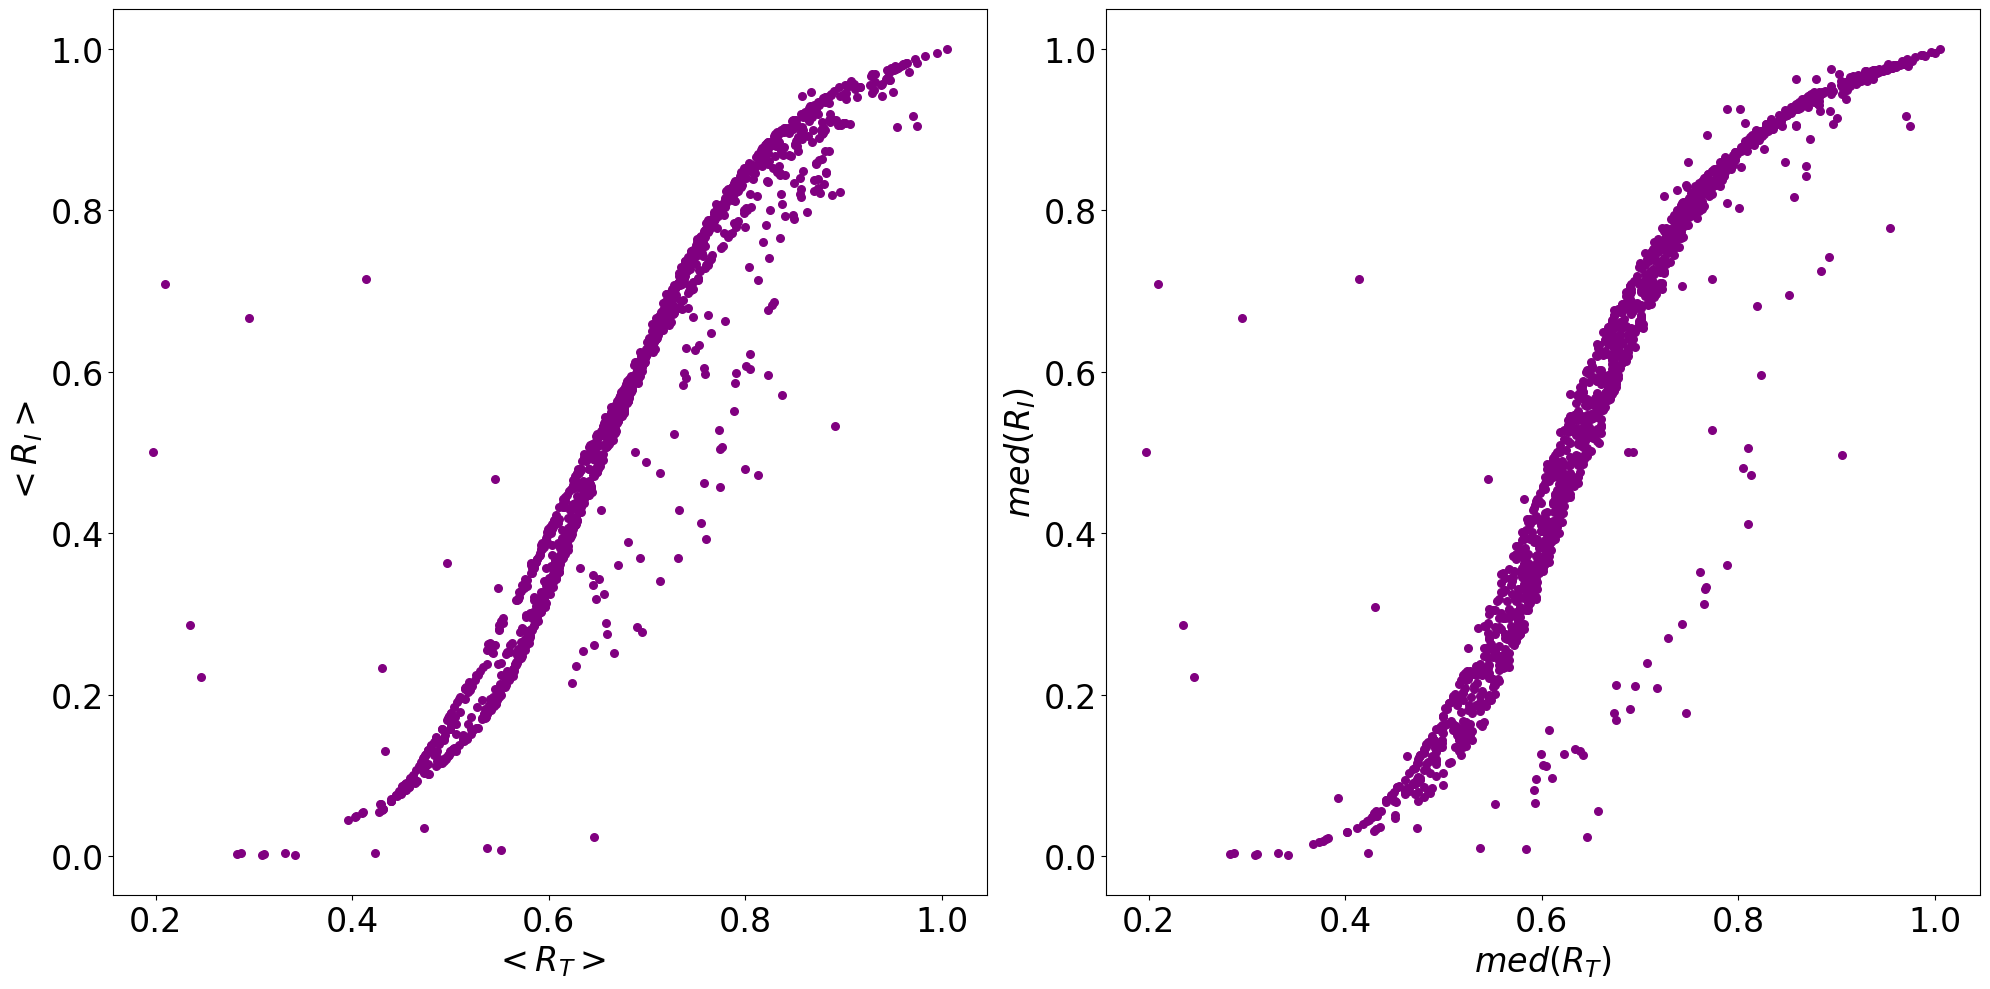

In [13]:
## finally, compare RT and RI 

fig,axs = plt.subplots(1,2,figsize=(20,10))

axs_fs = 24
title_fs = 24
tick_fs = 24
scat_size = 30

# Plot Comparison against D_F
#sent_idx = sent_di.index
sum_rank_df = ranked_data.groupby(["sent"])["d_f"].agg("sum")
df_idx = sum_rank_df.index
#mean_combined = list(zip(list(avg_di),list(sum_rank_df)))
davgt_x,davgi_y = ret_xy(avg_dt,avg_di)
dmedt_x,dmedi_y = ret_xy(med_dt,med_di)
        
axs[0].scatter(davgt_x,davgi_y,color="purple",s=scat_size)
axs[0].set_xlabel(f"$<R_T>$",fontsize=axs_fs)
axs[0].set_ylabel(f"$<R_I>$",fontsize=axs_fs)
axs[0].tick_params(labelsize=tick_fs)
#axs[1,0].set_title("Average",fontsize=title_fs)
axs[1].scatter(dmedt_x,dmedi_y,color="purple",s=scat_size)
axs[1].set_xlabel(f"$med(R_T)$",fontsize=axs_fs)
axs[1].set_ylabel(f"$med(R_I)$",fontsize=axs_fs)
axs[1].tick_params(labelsize=tick_fs)
#axs[1,1].title("Average",fontsize=title_fs)
#axs[1,1].tight_layout()
plt.tight_layout()
plt.savefig("allrt_ri.png")

1.0


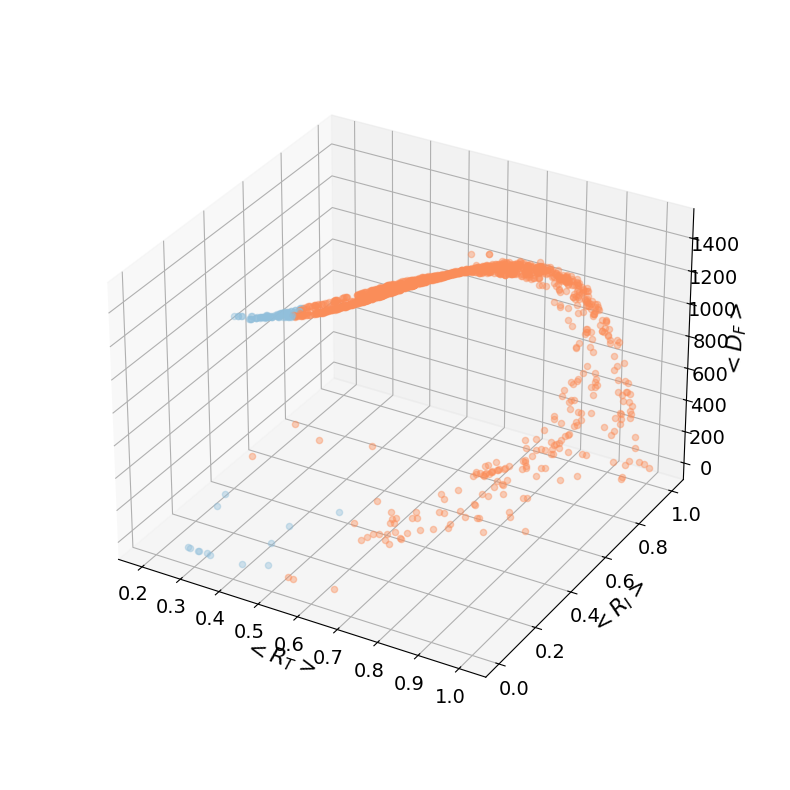

<Figure size 640x480 with 0 Axes>

In [63]:
#### 3-dimensional map for visualization purposes 
#### then look for ones that minimize all 3
### another direction: compare to degree, weight, other metrics...

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
top_color = "#91bfdb"
reg_color = "#fc8d59"
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
all_vals = []
for i in range(0,len(davgt_x)):
    all_vals.append((davgt_x[i],davgi_y[i],davgf_y[i]))
for dt_avg,di_avg,df_avg in all_vals:
    c = reg_color

    if di_avg < 0.5 and dt_avg < 0.5:
        c = top_color
    ax.scatter(dt_avg,di_avg,df_avg,color=c,alpha=0.4)

ax.set_xlabel(f'$<R_T>$',fontsize=16)
ax.set_ylabel(f'$<R_I>$',fontsize=16)
ax.set_zlabel(f'$<D_F>$',fontsize=16)
ax.set_box_aspect(None, zoom=0.85)
ax.tick_params(labelsize=14)
#ax.tight_layout()
plt.show()
plt.savefig("avg_sent_3d.png")

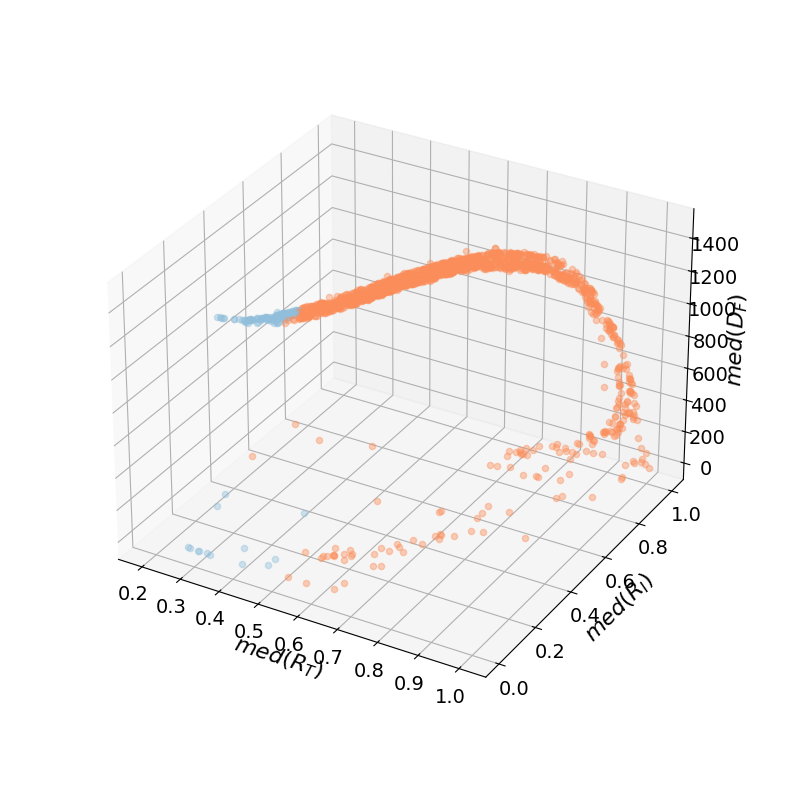

<Figure size 640x480 with 0 Axes>

In [69]:
#### 3-dimensional map for visualization purposes 
#### then look for ones that minimize all 3
### another direction: compare to degree, weight, other metrics...

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
top_color = "#91bfdb"
reg_color = "#fc8d59"
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
all_vals = []
for i in range(0,len(dmedt_x)):
    all_vals.append((dmedt_x[i],dmedi_y[i],dmedf_y[i]))
for dt_med,di_med,df_med in all_vals:
    c = reg_color

    if di_med < 0.5 and dt_med < 0.5:
        c = top_color
    ax.scatter(dt_med,di_med,df_med,color=c,alpha=0.4)

ax.set_xlabel(f'$med(R_T)$',fontsize=16)
ax.set_ylabel(f'$med(R_I)$',fontsize=16)
ax.set_zlabel(f'$med(D_F)$',fontsize=16)
ax.set_box_aspect(None, zoom=0.85)
ax.tick_params(labelsize=14)
#ax.tight_layout()
plt.show()
plt.savefig("med_sent_3d.png")

In [79]:
# python3
import numpy as np
import matplotlib.pyplot as plt

def plot_three_boxplots(davgf_y, dmedt_x, dmedi_x, f, outfile="dist_df.png"):
    # Build df_dist safely (avoid divide-by-zero if max is 0)
    max_val = max(davgf_y) if len(davgf_y) else 0
    if max_val == 0:
        df_dist = [0.0 for _ in davgf_y]
    else:
        df_dist = [(1 - d / max_val) for d in davgf_y]

    data = [df_dist, dmedt_x, dmedi_x]
    if f == "med":
        labels = [f"R_F", f"med($R_T$)", f"med($R_I$)"]
    if f == "avg":
        labels = [f"R_F", f"$<R_T>$)", f"$<R_I>$)"]
    positions = [1, 2, 3]

    plt.figure(figsize=(6, 4))
    # One call puts them on the same axes, evenly spaced
    plt.boxplot(
        data,
        positions=positions,
        widths=0.6,
        patch_artist=False,   # set True if you want filled boxes
        showfliers=True       # keep outliers; set False to hide
    )
    plt.xticks(positions, labels)
    plt.xlabel("Series")
    plt.ylabel("Values")
    plt.title("Three Boxplots")
    plt.tight_layout()
    plt.savefig(outfile, dpi=300)
    plt.close()

# --- Example usage (assumes your arrays already exist) ---
# plot_three_boxplots(davgf_y, dmedt_x, dmedi_x, outfile="dist_df.png")
plot_three_boxplots(dmedf_y, dmedt_x, dmedi_x, "med",outfile="med_dist_df.png")
plot_three_boxplots(davgf_y, davgt_x, davgi_x, "avg",outfile="avg_dist_df.png")

In [ ]:
ranked_data["norm_di"] = ranked_data["d_i"] / ranked_data["real_os"]
sent_di = ranked_data.groupby(["sent"])["norm_di"].agg("mean")
sent_idx = sent_di.index
sum_rank_df = ranked_data.groupby(["sent"])["d_f"].agg("sum")
df_idx = sum_rank_df.index
combined = list(zip(list(sent_di),list(sum_rank_df)))
di_x = [x for x,y in combined]
df_y = [y for x,y in combined]
new_dix = []
new_dfy = []
for d in range(0,len(di_x)):
    new_dix.append(di_x[d])
    new_dfy.append(df_y[d])
        
plt.scatter(new_dix,new_dfy,color="red")
plt.xlabel(f"$<R_I>$",fontsize=axs_fs)
plt.ylabel(f"$d_F$",fontsize=axs_fs)
plt.tick_params(labelsize=tick_fs)
plt.title("Average",fontsize=title_fs)
plt.tight_layout()
plt.savefig("medri_df.png")

In [ ]:
ranked_data["norm_di"] = ranked_data["d_i"] / ranked_data["real_os"]
sent_di = ranked_data.groupby(["sent"])["norm_di"].agg("median")
sent_idx = sent_di.index
sum_rank_df = ranked_data.groupby(["sent"])["d_f"].agg("sum")
df_idx = sum_rank_df.index
combined = list(zip(list(sent_di),list(sum_rank_df)))
di_x = [x for x,y in combined]
df_y = [y for x,y in combined]
new_dix = []
new_dfy = []
for d in range(0,len(di_x)):
    new_dix.append(di_x[d])
    new_dfy.append(df_y[d])
print(min(new_dfy))
print(len(combined))
plt.scatter(new_dix,new_dfy,color="red")
plt.xlabel(f"$med(R_I)$",fontsize=axs_fs)
plt.ylabel(f"$d_F$",fontsize=axs_fs)
plt.tick_params(labelsize=tick_fs)
plt.title("Median",fontsize=title_fs)
plt.tight_layout()
plt.savefig("medri_df.png")

In [ ]:
## what is jaccard correlation between top di,dt,dc,df?
head_vals = 500
j_dit,j_dif,j_dic,j_dfc,j_dtc,j_dft = [],[],[],[],[],[]
all_x = []
for i in range(1,head_vals):
    top_di = set(id_di[0:i])
    top_dc = set(id_dc[0:i])
    top_dt = set(id_dt[0:i])
    top_df = set(id_df[0:i])
    jacc_dit = jaccard_similarity(top_di,top_dt)
    jacc_dic = jaccard_similarity(top_di,top_dc)
    jacc_dif = jaccard_similarity(top_di,top_df)
    jacc_dfc = jaccard_similarity(top_df,top_dc)
    jacc_dtc = jaccard_similarity(top_dt,top_dc)
    jacc_dft = jaccard_similarity(top_df,top_dt)

    j_dit.append(jacc_dit)
    j_dif.append(jacc_dif)
    j_dic.append(jacc_dic)
    j_dfc.append(jacc_dfc)
    j_dtc.append(jacc_dtc)
    j_dft.append(jacc_dft)
    all_x.append(i)
plt.plot(all_x,j_dit,label=f"$J(d_i,d_t)$")
plt.plot(all_x,j_dif,label=f"$J(d_i,d_f)$")
plt.plot(all_x,j_dic,label=f"$J(d_i,d_c)$")
plt.plot(all_x,j_dfc,label=f"$J(d_f,d_c)$")
plt.plot(all_x,j_dtc,label=f"$J(d_t,d_c)$")
plt.plot(all_x,j_dft,label=f"$J(d_f,d_t)$")

plt.xlabel("Top k-nodes",fontsize=16)
plt.ylabel("Jaccard Similarity",fontsize=16)
plt.tick_params(labelsize=16)
plt.legend(fontsize=16)

In [ ]:
# let's exclude all the nodes that get no infections! 
all_freqs = list(sum_rank_df)
freq_ids = list(sum_rank_df.index)
zero_ids = []
print(len(freq_ids))
for f in range(0,len(freq_ids)):
    if all_freqs[f] == 0:
        zero_ids.append(freq_ids[f])
print("Never-Infected Seeds: ",len(zero_ids))

In [ ]:
fig,axs = plt.subplots(4,1,figsize=(15,23))
all_dt = (ranked_data.groupby(["sent"])["d_t"].agg("median"))
all_dc = (ranked_data.groupby(["sent"])["d_c"].agg("median"))
all_di = (ranked_data.groupby(["sent"])["d_i"].agg("median"))
id_dt = list(all_dt.index)
id_dc = list(all_dc.index)
id_di = list(all_di.index)
all_dt = list(ranked_data.groupby(["sent"])["d_t"].agg("median"))
all_dc = list(ranked_data.groupby(["sent"])["d_c"].agg("median"))
all_di = list(ranked_data.groupby(["sent"])["d_i"].agg("median"))
full_dt,full_dc,full_di,full_df = [],[],[],[]
for i in range(0,len(all_dt)):
 
    if id_dt[i] not in zero_ids:
        full_dt.append(all_dt[i])
    if id_dc[i] not in zero_ids:
        full_dc.append(all_dc[i])
    if id_di[i] not in zero_ids:
        full_di.append(all_di[i])
    if freq_ids[i] not in zero_ids:
        full_df.append(all_freqs[i])
print(len(full_df))
#fig,axs = plt.subplots(1,4,figsize=(20,6))
axs_fs = 28
tick_fs = 26
fig.suptitle("Filtered Data \n",fontsize=26)
axs[0].hist(full_df)
axs[0].set_xlabel(f"$d_F$",fontsize=axs_fs)
axs[0].set_ylabel(f"Density of $d_F$",fontsize=axs_fs)
axs[0].tick_params(labelsize=tick_fs)
axs[1].hist(full_dc)
axs[1].set_xlabel(f"$d_C$",fontsize=axs_fs)
axs[1].set_ylabel(f"Density of $d_C$",fontsize=axs_fs)
axs[1].tick_params(labelsize=tick_fs)
axs[2].hist(full_di)
axs[2].set_xlabel(f"$d_I$",fontsize=axs_fs)
axs[2].set_ylabel(f"Density of $d_I$",fontsize=axs_fs)
axs[2].tick_params(labelsize=tick_fs)
axs[3].hist(full_dt)
axs[3].set_xlabel(f"$d_T$",fontsize=axs_fs)
axs[3].set_ylabel(f"Density of $d_T$",fontsize=axs_fs)
axs[3].tick_params(labelsize=tick_fs)
plt.savefig("filtered_data.png")
fig.tight_layout()

In [ ]:
dc_vals,di_vals,dt_vals,df_vals = {},{},{},{}
all_x = []
for i in range(0,len(dc_rank)):
    dc_vals[id_dc[i]] = dc_rank[i]
    di_vals[id_di[i]] = di_rank[i]
    dt_vals[id_dt[i]] = dt_rank[i]
    df_vals[id_df[i]] = df_rank[i]
plt.scatter(list(di_vals.values()),list(dt_vals.values()))
plt.xlabel(f"Rank$(d_I)$")
plt.ylabel(f"Rank($d_T$)")

In [ ]:
plt.scatter(list(di_vals.values()),list(df_vals.values()))
plt.xlabel(f"Rank$(d_I)$")
plt.ylabel(f"Rank($d_F$)")

In [ ]:
top_dt = list(dt_vals.values())
top_di = list(di_vals.values())

In [ ]:
plt.scatter(list(dt_vals.values()),list(dc_vals.values()))
plt.xlabel(f"$Rank(d_I)$")
plt.ylabel(f"$Rank(d_C)$")

In [ ]:
plt.scatter(list(dt_vals.values()),list(df_vals.values()))
plt.xlabel(f"Rank$(d_T)$")
plt.ylabel(f"Rank($d_F$)")

In [ ]:
plt.scatter(list(dc_vals.values()),list(df_vals.values()))
plt.xlabel(f"Rank$(d_C)$")
plt.ylabel(f"Rank($d_F$)")